# Assignment 3

#### Student ID: *M112040034*

#### Name: *李祐瑄*

Firstly, install the following dependencies:

In [ ]:
!pip install git+https://github.com/phonchi/playground-data.git -qq
!pip install cleanlab -qq
!pip install scikeras -qq

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 17.8 MB/s eta 0:00:00


To ensure reproducibility, please set all the random seeds to 2023:

## Q1: Exploring the TensorFlow playground

[TensorFlow Neural Net Playground](http://playground.tensorflow.org/) is an interactive, web-based visualization tool to facilitate a deeper understanding of neural networks and their underlying concepts. It allows users to experiment with various neural network architectures, hyperparameters, and activation functions in real-time, without extensive coding or expertise in machine learning. The Playground features a simple, user-friendly interface that visually represents the neural network's structure and learning process. Users can adjust the number of layers, neurons, learning rate, regularization techniques, and more while observing how these changes impact the network's performance on synthetic datasets.

In this exercise, we will explore the web interface and replicate the experiment using `Python` (You are free to use `Tensorflow`, `Pytorch` or other libraries to do the exercise).

#### (a) Execute the following steps first: (10%)
1. Choose the circle dataset (top-left dataset under "DATA" panel). 
2. Reduce the hidden layer to only one layer and change the activation function to "ReLU". 
3. Run the model five times. Before each trial, hit the "Reset the network" button to get a new random initialization. (The "Reset the network" button is the circular reset arrow just to the left of the Play button.) 
4. Let each trial run for at least 500 epochs to ensure convergence. 

Make some comments about the role of initialization in this non-convex optimization problem. What is the minimum number of neurons required (Keeping all other parameters unchanged) in this single layer NN to ensure that it almost always converges to global minima (where the test loss is below 0.015)? Finally, paste the convergence results below.

* Note the convergence pictures should include all the settings and the model. An example is available [here](https://drive.google.com/file/d/1zLN-bNtiHNc1x8Ne1-a572nRQRt7AMph/view?usp=sharing) (The setting is the default and you need to change it according to the description above).

> Ans: 如果在激活函數為ReLU且每個模型訓練至少500個epochs的情況下，輸入層只有X1和X2，且只用一層隱藏層就要將神經網絡收斂到test loss小於0.015，那麼隱藏層需要至少5個神經元。這可能是因為在圓形數據集中，隱藏層需要足夠的神經元來捕捉數據中複雜的非線性特徵。在ReLU激活函數下，每個隱藏神經元可以表示特定空間區域內的線性決策邊界，因此需要多個神經元來表示更複雜的決策邊界。

The convergence results (double click to change the id):

<p align="center">
<img src="https://drive.google.com/uc?id=1iJEyo-SUBMm21MegJA7zPsCkqshc7MbA" alt="drawing" width="600"/>
</p>

在此圖中有500個epoch，hidden layer的部分使用五個神經元，test loss收斂到了0.003 (<0.015)

#### (b) Execute the following code to import the circle dataset and plot the data and decision boundary: (10%)

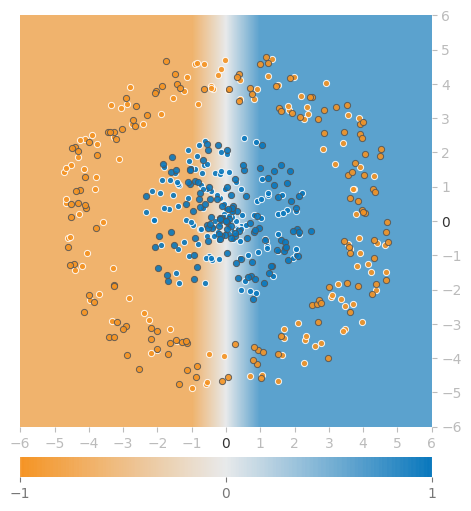

In [ ]:
import plygdata as pg
from plygdata.playground import Player

data_noise = 0
validation_data_ratio = 0.5

# Generate data
data_array = pg.generate_data(pg.DatasetType.ClassifyCircleData, data_noise)
X_train, y_train, X_valid, y_valid = pg.split_data(data_array, validation_size=validation_data_ratio)

# Plot the data on the standard graph for Playground
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
# draw the decision boundary of X1 input (feature)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, discretize=False);

Now build the DNN you find in (a) and train the DNN with SGD optimizer, report the final accuracy on the validation set and plot the decision boundary using the following code:

```python
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
prob = model.predict(xx) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);
```

Finally, plot the learning curve (loss and accuracy vs. epochs) during training. Do your results match (a)?

Hint: The label is `-1` and `1` by default in the playground; you can change them to 0, 1 and use `sigmoid` in the final layer with binary cross entropy as the loss function. In addition, your loss may be slightly higher than the one in the playground if you use binary cross entropy as the loss function. You don't have to deal with this discrepancy in this exercise.

In [ ]:
import tensorflow as tf

# 將label從-1,1換成0,1
y_train_modified = (y_train + 1) // 2
y_valid_modified = (y_valid + 1) // 2

# 建立模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(2,)),  # 5個神經元的隱藏層，ReLU激活函數
    tf.keras.layers.Dense(1, activation='sigmoid')  # 1個神經元的輸出層，sigmoid激活函數
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])#使用SGD進行最佳化

# 訓練模型
history = model.fit(X_train, y_train_modified, epochs=500, batch_size=10, validation_data=(X_valid, y_valid_modified))

# 輸出在驗證集上的準確率
accuracy = model.evaluate(X_valid, y_valid_modified)[1]
print("Validation accuracy:", accuracy)


Epoch 1/500
25/25 [==============================] - 1s 9ms/step - loss: 0.6401 - accuracy: 0.5440 - val_loss: 0.6142 - val_accuracy: 0.6040
Epoch 2/500
25/25 [==============================] - 0s 5ms/step - loss: 0.5997 - accuracy: 0.6360 - val_loss: 0.5843 - val_accuracy: 0.6680
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.6800 - val_loss: 0.5623 - val_accuracy: 0.7000
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5453 - accuracy: 0.7240 - val_loss: 0.5448 - val_accuracy: 0.7440
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5247 - accuracy: 0.7280 - val_loss: 0.5316 - val_accuracy: 0.7480
Epoch 6/500
25/25 [==============================] - 0s 5ms/step - loss: 0.5070 - accuracy: 0.7560 - val_loss: 0.5194 - val_accuracy: 0.7520
Epoch 7/500
25/25 [==============================] - 0s 5ms/step - loss: 0.4920 - accuracy: 0.7600 - val_loss: 0.5095 - val_accuracy: 0.7600
Epoch 8/500
2

313/313 [==============================] - 0s 1ms/step


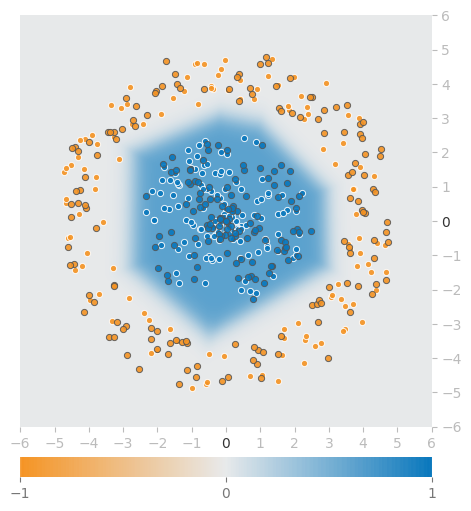

In [ ]:
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
prob = model.predict(xx) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);

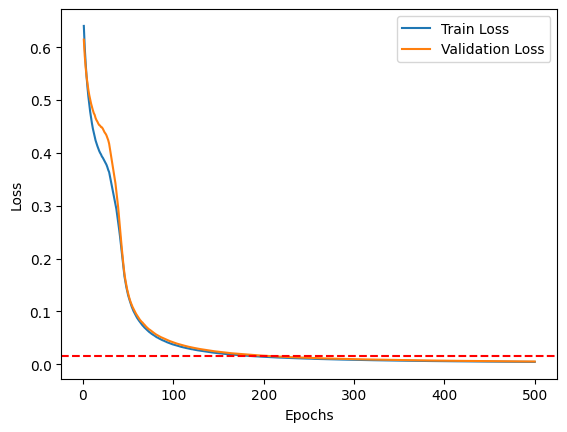

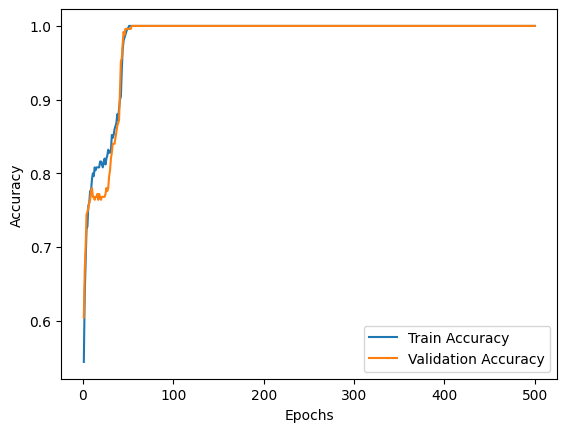

In [ ]:
import matplotlib.pyplot as plt
# 儲存訓練過程中的loss和accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 畫出loss曲線
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# y=0.015的水平線
plt.axhline(y=0.015, color='r', linestyle='--', label='y = 0.015')
plt.show()

# 畫出準確率曲線
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

> Ans: 以epochs都為500次,learning rate=0.03的預設情況下，在loss vs. epochs的圖中，從曲線上來看隨著epoch的次數上升，loss下降的速度與(a)得到的結果還算類似，而且最後的loss為0.0052也有低於0.015(紅色虛線)，雖然不同於(a)的loss為0.003，但是從accuracy vs. epochs的圖中，準確率還是很不錯的，最終是落在了1

#### (c) Execute the following steps first: (10%)
1. Change the dataset to the spiral (bottom-right dataset under "DATA" panel). 
2. Increase the noise level to 50 and leave the training and test set ratio unchanged. 
3. Train the best model you can. Feel free to add or remove layers and neurons. You can also change learning settings like learning rate, regularization rate, activations and batch size. In addition, you can also increase the input features to include interaction terms or others. Try to get the test loss below 0.15. 

How many parameters do you have in your models? Describe the model architecture and the training strategy you use. Finally, paste the convergence results below. 

* You may need to train the model for enough epochs here and use learning rate scheduling manually.

> Ans: DNN的參數架構，learning rate=0.03， 激活函數使用ReLU，Regularization使用L2;rate為0.003，使用4個特徵屬性分別為X1、X2、X1^2以及X2^2)，隱藏層有3層分別為6個、6個和4個神經元，最終在Noise設為50，Data為Spiral的情況下，epochs為1300，test loss可以達到0.113(<0.15)

The convergence results (double click to change the id):

<p align="center">
<img src="https://drive.google.com/uc?id=1viwQ8lzHORwn1N-5hGfuuetKUEOgDxQB" alt="drawing" width="600"/>
</p>

#### (d) Execute the following code to import the noisy spircal dataset and plot the data and decision boundary: (10%)

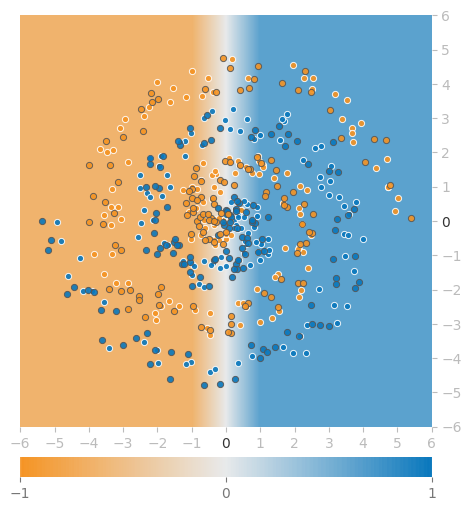

In [ ]:
import plygdata as pg
from plygdata.playground import Player

data_noise=0.5
validation_data_ratio = 0.5

# Generate data
data_array = pg.generate_data(pg.DatasetType.ClassifySpiralData, data_noise)


X_train, y_train, X_valid, y_valid = pg.split_data(data_array, validation_size=validation_data_ratio)


# Plot the data on the standard graph for Playground
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, discretize=False);

Now build the DNN you find in (c) and train the DNN with SGD optimizer, report the final accuracy on the validation set and plot the decision boundary using the following code:

```python
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
prob = model.predict(xx) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);
```


Finally, plot the learning curve during training. Do your results match (c)?

Hint: Your loss may be slightly higher than the one in the playground if you use binary cross entropy as the loss function. You don't have to deal with this discrepancy in this exercise.

In [ ]:
import tensorflow as tf
import numpy as np

# 將標籤從-1,1換成0,1
y_train_modified = (y_train + 1) / 2
y_valid_modified = (y_valid + 1) / 2

# 建立模型，三層隱藏層使用6,6,4個神經元，激活函數使用ReLU，正規化使用L2;rate=0.003
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(4,), kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

# 特徵工程(使用原來的、平方以及sin)
X_train_modified = np.hstack((X_train, X_train ** 2))
X_valid_modified = np.hstack((X_valid, X_valid ** 2))

# 訓練模型
history = model.fit(X_train_modified, y_train_modified, epochs=1300, batch_size=10 ,validation_data=(X_valid_modified, y_valid_modified))

# 輸出在驗證集上的準確率
accuracy = model.evaluate(X_valid_modified, y_valid_modified)[1]
print("Validation accuracy:", accuracy)

Epoch 1/1300
25/25 [==============================] - 1s 10ms/step - loss: 0.7517 - accuracy: 0.5080 - val_loss: 0.7517 - val_accuracy: 0.5040
Epoch 2/1300
25/25 [==============================] - 0s 3ms/step - loss: 0.7454 - accuracy: 0.4760 - val_loss: 0.7462 - val_accuracy: 0.5000
Epoch 3/1300
25/25 [==============================] - 0s 4ms/step - loss: 0.7425 - accuracy: 0.4840 - val_loss: 0.7437 - val_accuracy: 0.5000
Epoch 4/1300
25/25 [==============================] - 0s 3ms/step - loss: 0.7408 - accuracy: 0.4720 - val_loss: 0.7420 - val_accuracy: 0.5000
Epoch 5/1300
25/25 [==============================] - 0s 3ms/step - loss: 0.7399 - accuracy: 0.4880 - val_loss: 0.7407 - val_accuracy: 0.5000
Epoch 6/1300
25/25 [==============================] - 0s 3ms/step - loss: 0.7389 - accuracy: 0.4680 - val_loss: 0.7397 - val_accuracy: 0.5000
Epoch 7/1300
25/25 [==============================] - 0s 5ms/step - loss: 0.7381 - accuracy: 0.5000 - val_loss: 0.7388 - val_accuracy: 0.5120
Epoch

313/313 [==============================] - 0s 1ms/step


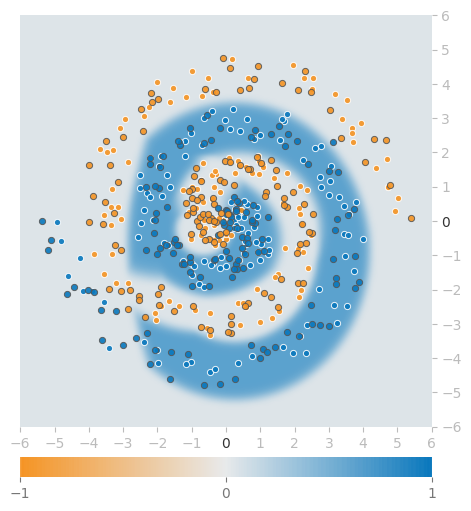

In [ ]:
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
xx_modified = np.hstack((xx, xx ** 2))
prob = model.predict(xx_modified)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False)


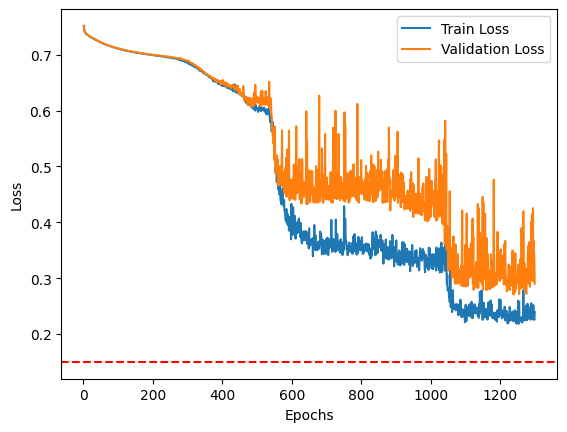

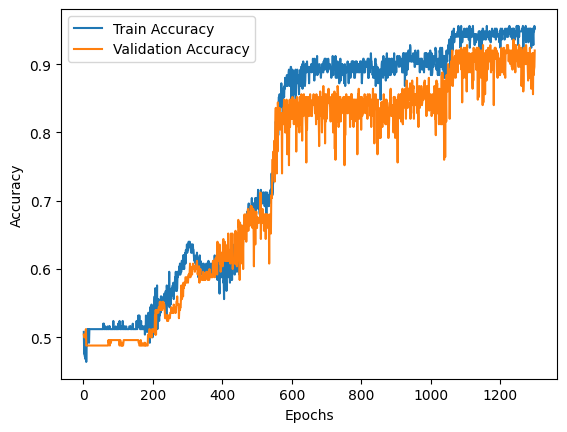

In [ ]:
import matplotlib.pyplot as plt
# 儲存訓練過程中的loss和accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 畫出loss曲線
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# y=0.15的水平線
plt.axhline(y=0.15, color='r', linestyle='--', label='y = 0.15')
plt.show()

# 畫出準確率曲線
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


> Ans: 從loss 及accuracy vs. Epochs的圖來看，可以發現晃動的幅度很大，最後loss落在0.2899，與(c)得到的0.113小於0.15(紅色虛線)的結果不同，但Accuracy有達到0.92



#### (e) You may find the learning curve you get in (d) is noisy and require many epochs to converge. Try to improve the DNN in (d) by changing the network architecture, learning rate schedule, or optimizer so that the learning curve becomes smoother and converges faster. (10%)

Finally, plot the learning curve during training and draw the decision boundary using the following code:

```python
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
prob = model.predict(xx) # or model(xx)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False);
```

In [ ]:
# coding your answer here.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(4,), kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train_modified, y_train_modified, epochs=1300, batch_size=10 ,validation_data=(X_valid_modified, y_valid_modified))

# 輸出在驗證集上的準確率
accuracy = model.evaluate(X_valid_modified, y_valid_modified)[1]
print("Validation accuracy:", accuracy)

Epoch 1/1300
25/25 [==============================] - 1s 10ms/step - loss: 0.7555 - accuracy: 0.4960 - val_loss: 0.7618 - val_accuracy: 0.5520
Epoch 2/1300
25/25 [==============================] - 0s 3ms/step - loss: 0.7474 - accuracy: 0.5400 - val_loss: 0.7574 - val_accuracy: 0.5480
Epoch 3/1300
25/25 [==============================] - 0s 5ms/step - loss: 0.7437 - accuracy: 0.5480 - val_loss: 0.7541 - val_accuracy: 0.5440
Epoch 4/1300
25/25 [==============================] - 0s 4ms/step - loss: 0.7397 - accuracy: 0.5440 - val_loss: 0.7508 - val_accuracy: 0.5560
Epoch 5/1300
25/25 [==============================] - 0s 3ms/step - loss: 0.7367 - accuracy: 0.5520 - val_loss: 0.7474 - val_accuracy: 0.5600
Epoch 6/1300
25/25 [==============================] - 0s 5ms/step - loss: 0.7340 - accuracy: 0.5640 - val_loss: 0.7448 - val_accuracy: 0.5600
Epoch 7/1300
25/25 [==============================] - 0s 3ms/step - loss: 0.7318 - accuracy: 0.5600 - val_loss: 0.7424 - val_accuracy: 0.5640
Epoch

313/313 [==============================] - 0s 1ms/step


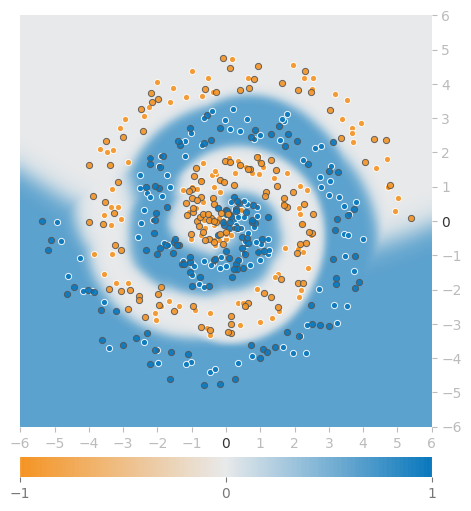

In [ ]:
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)
xx = Player.get_boundary_array()
xx_modified = np.hstack((xx, xx ** 2))
prob = model.predict(xx_modified)
pg.draw_decision_boundary(fig, ax, node_id=pg.InputType.X1, prob=prob, discretize=False)


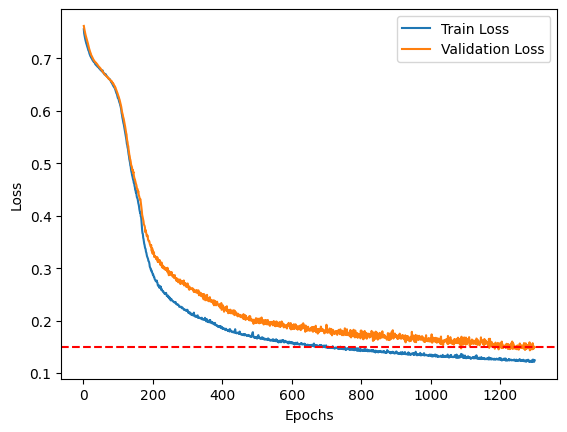

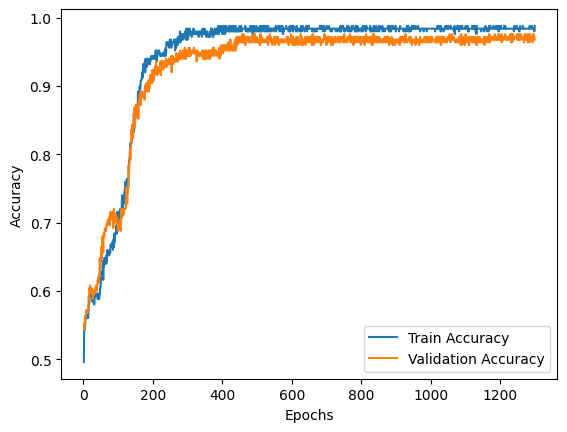

In [ ]:
import matplotlib.pyplot as plt
# 儲存訓練過程中的loss和accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 畫出loss曲線
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# y=0.15的水平線
plt.axhline(y=0.15, color='r', linestyle='--', label='y = 0.15')
plt.show()

# 畫出準確率曲線
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


> Ans: 相較於(d)的模型架構，我修改了三個地方，分別為Regularization rate從0.003改為0.005，其次是將優化器由SGD改用Adam，最後將learning rate從0.03縮小為0.001，從boundary的圖來看，分的也比(d)更好，而從curve的圖來看，可以發現修改過後的架構，loss在epoch約400之前就已經大幅下降，後續震盪的幅度也比(d)的結果小很多，最後loss: 0.1496也成功小於0.15，而accuracy也比(d)更好為0.9680



## Q2 Explore the CNN explainer

[CNN Explainer](https://poloclub.github.io/cnn-explainer/) is an interactive, open-source visualization tool designed to provide a comprehensive understanding of Convolutional Neural Networks (CNNs). The explainer aims to demystify the inner workings of CNNs through visualizations and step-by-step explanations. The platform offers a guided walkthrough of the building blocks of CNNs, including convolutional layers, activation functions, pooling layers, and fully connected layers. It allows users to interactively explore the components, visualize feature maps, and understand the effects of different hyperparameters on the network's performance. 

In this exercise, we will explore the web interface and replicate the experiment using `Python` (You are free to use `Tensorflow`, `Pytorch` or other libraries to do the exercise).

#### (a) Firstly, explore the CNN explainer and answer the following questions: (10%)

1. What is the shape of the input and output of the network?
2. What are the kernel size, stride, padding, and number of filters used in all the conv layer?
3. What are the kernel size, stride, and number of filters used in all the pooling layer?
4. How many parameters are used in the final dense layer?

> Ans:

1.輸入層是64*64，RGB 3通道，輸出層為10。

2.Convolution layer

kernel size:3*3

stride:1; 
 
padding: no padding(valid); 
 
number of filters:分別都使用了10個

3.Pooling layer

kernel size:2*2

stride:2

number of filters:使用了1個

4.16910個參數(13 * 13 * 10)*10+10

#### (b) Based on the observation in (a), build the same CNN using `Python` and report the total number of parameters and architecture using `summary()`. Remember to rescale or normalize the input before feeding it into the network. (10%)

In [ ]:
#掛載google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#解壓縮檔案至當前環境
import shutil
zip_file_path = '/content/gdrive/MyDrive/Colab Notebooks/data_hw3/data_hw3.zip'  # 指定ZIP檔案在Google雲端硬碟中的路徑
target_directory = '/content'  # 指定解壓縮後的目標目錄路徑
shutil.copyfile(zip_file_path, 'data_hw3.zip')  # 將ZIP檔案從Google雲端硬碟複製到Colab中
shutil.unpack_archive('data_hw3.zip', target_directory)  # 解壓縮ZIP檔案到目標目錄中

In [ ]:
# coding your answer here.
import os
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

#讀取json獲取label資訊
with open('/content/class_dict.json', 'r') as f:
    labels_info = json.load(f)

num_classes = len(labels_info)

#包含數據前處理的CNN架構
model = Sequential([
    Rescaling(1./255, input_shape=(64, 64, 3)),  # 數據預處理(輸入層)
    Conv2D(filters=10, kernel_size=(3, 3), strides=1, activation='relu', name='conv_1_1'),
    Conv2D(filters=10, kernel_size=(3, 3), strides=1, activation='relu', name='conv_1_2'),
    MaxPooling2D(pool_size=(2, 2), strides=2, name='maxpool_1'),
    Conv2D(filters=10, kernel_size=(3, 3), strides=1, activation='relu', name='conv_2_1'),
    Conv2D(filters=10, kernel_size=(3, 3), strides=1, activation='relu', name='conv_2_2'),
    MaxPooling2D(pool_size=(2, 2), strides=2, name='maxpool_2'),
    Flatten(name='flatten'),
    Dense(num_classes, activation='softmax', name='output')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv_1_1 (Conv2D)           (None, 62, 62, 10)        280       
                                                                 
 conv_1_2 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 30, 30, 10)        0         
                                                                 
 conv_2_1 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 conv_2_2 (Conv2D)           (None, 26, 26, 10)        910       
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 13, 13, 10)        0

#### (c) Download the dataset from our course website and load the training, validation and testing dataset from the folders `class_10_train`, `class_10_val/val_images` and `class_10_val/test_images`, respectively. Remember to resize the images to $64 \times 64$ and set the batch size to 32. Finally, draw `9` random samples from the training set and plot them. (10%)

Found 5000 files belonging to 10 classes.
Found 250 files belonging to 10 classes.
Found 250 files belonging to 10 classes.


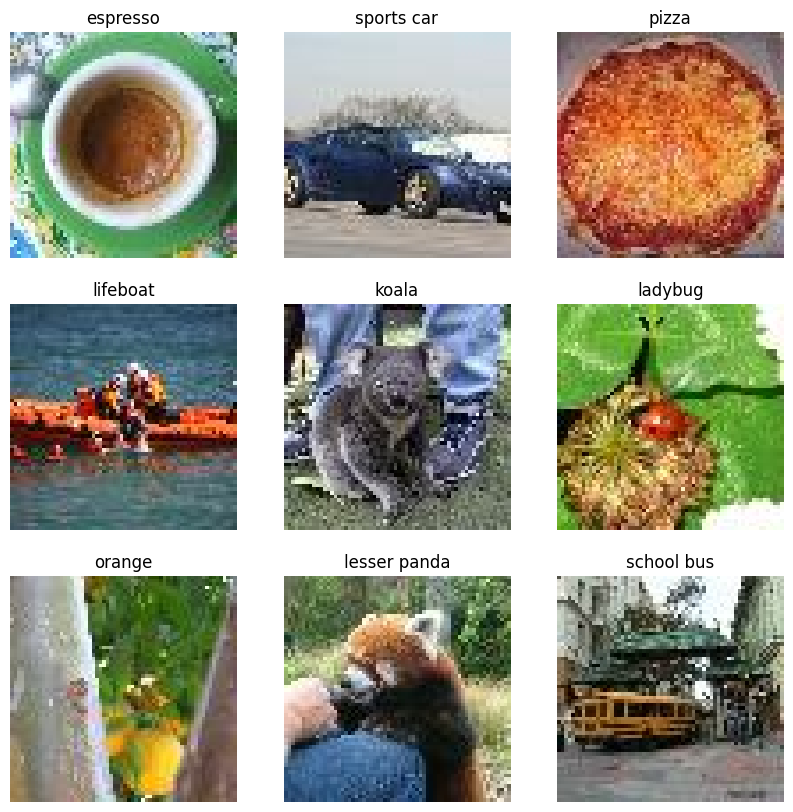

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files

#讀取json獲取label資訊
with open('/content/class_dict.json', 'r') as f:
    labels_info = json.load(f)

class_names = list(labels_info.keys())
#讀取所有資料夾
class_10_train = "/content/class_10_train"
class_10_val = "/content/class_10_val"

#存取並定義訓練、驗證及測試集
train_dataset = image_dataset_from_directory(
    class_10_train,
    image_size = (64, 64),
    batch_size=32,
    class_names=class_names,
    label_mode='categorical'
)

validation_dataset = image_dataset_from_directory(
    os.path.join(class_10_val, 'val_images'),  # `class_10_val`資料夾中有`valid`子資料夾
    image_size = (64, 64),
    batch_size=32,
    class_names=class_names,
    label_mode='categorical'
)

test_dataset = image_dataset_from_directory(
    os.path.join(class_10_val, 'test_images'),  # `class_10_val`資料夾中有'test`子資料夾
    image_size = (64, 64),
    batch_size=32,
    class_names=class_names,
    label_mode='categorical'
)
# 繪製並顯示9個隨機樣本的影像
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title_cate = class_names[labels[i].numpy().argmax()]#取得圖片對應資料夾名稱
        title_name = labels_info[title_cate]['class']#取得資料夾對應類別名稱
        #因為同個類別下有很多種名稱，圖中顯示第一種說法
        title_name = title_name.split(',')
        title_name = title_name[0]
        plt.title(title_name)
        plt.axis("off")
plt.show()

#### (d) We are going to use the data loaded in (c) to train the CNN in (b). First, add the callback to monitor the validation loss and save the best model base on the validation loss. Secondly, train the model you build in (b) with the `Adam` optimizer for 50 epochs. Thirdly, plot the learning curve after training. Finally, reload the best model and report the accuracy on the test set. (10%)

In [ ]:
# coding your answer here.

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="model.keras",
        save_best_only=True,
        monitor="val_loss")
]

# 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=50, callbacks=callbacks)

Epoch 1/50
157/157 [==============================] - 13s 15ms/step - loss: 1.9438 - accuracy: 0.2968 - val_loss: 1.6114 - val_accuracy: 0.4320
Epoch 2/50
157/157 [==============================] - 2s 13ms/step - loss: 1.4058 - accuracy: 0.5180 - val_loss: 1.3987 - val_accuracy: 0.5040
Epoch 3/50
157/157 [==============================] - 2s 9ms/step - loss: 1.2523 - accuracy: 0.5684 - val_loss: 1.2481 - val_accuracy: 0.5760
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 1.1360 - accuracy: 0.6158 - val_loss: 1.1737 - val_accuracy: 0.5880
Epoch 5/50
157/157 [==============================] - 1s 9ms/step - loss: 1.0417 - accuracy: 0.6566 - val_loss: 1.1535 - val_accuracy: 0.6440
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.9602 - accuracy: 0.6862 - val_loss: 1.0688 - val_accuracy: 0.6400
Epoch 7/50
157/157 [==============================] - 2s 9ms/step - loss: 0.8781 - accuracy: 0.7070 - val_loss: 0.9771 - val_accuracy: 0.6480
Epo

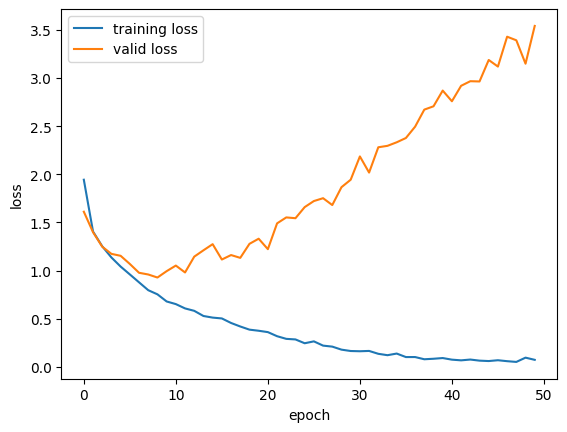

8/8 [==============================] - 0s 5ms/step - loss: 0.9662 - accuracy: 0.7120
test loss: 0.9662
test accuracy: 0.712


In [ ]:
# 繪製learning curve
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# 重新載入最佳模型
best_model = tf.keras.models.load_model("model.keras")

# 在測試集上評估最佳模型
test_loss, test_accuracy = best_model.evaluate(test_dataset)
print("test loss:", round(test_loss,4))
print("test accuracy:", round(test_accuracy,4))

#### (e) Looking at the learning curves, you can see that the model is overfitting. Try to add a data augmentation layer for the model in (b) as follows: (10%)

* Applies random horizontal flipping 
* Rotates the input images by a random value in the range `[–36 degrees, +36 degrees]`
* Zooms in or out of the image by a random factor in the range `[-20%, +20%]`
* Randomly choose a location to crop images down to a target size `[56, 56]`
* Randomly adjust the contrast of images so that the resulting images are `[0.85, 1.15]` brighter or darker than the original one

Fit your model for enough epochs (75, for instance), compare its performance and learning curves with the previous model in (d), and comment on the results. Finally, report the accuracy of the test set. Remember to reload the best model before the test.

In [ ]:
# coding your answer here.
from tensorflow.keras.layers import experimental
#建立augmentation layer
data_augmentation = Sequential([
        experimental.preprocessing.RandomFlip("horizontal"),  #隨機水平翻轉
        experimental.preprocessing.RandomRotation(factor=0.1),  # 隨機旋轉正負36度
        experimental.preprocessing.RandomZoom((-0.2, 0.2)),  # 隨機縮放正負20%
        experimental.preprocessing.RandomCrop(56, 56),  #隨機裁剪成56*56
        experimental.preprocessing.RandomContrast(factor=(0.85, 1.15))  #隨機調整亮度
    ])

#加入augmentation layer的CNN架構
model_improve = Sequential([
    Rescaling(1./255, input_shape=(64, 64, 3)),  # 數據預處理(輸入層)
    data_augmentation, #augmentation layer
    Conv2D(filters=10, kernel_size=(3, 3), strides=1, activation='relu', name='conv_1_1'),
    Conv2D(filters=10, kernel_size=(3, 3), strides=1, activation='relu', name='conv_1_2'),
    MaxPooling2D(pool_size=(2, 2), strides=2, name='maxpool_1'),
    Conv2D(filters=10, kernel_size=(3, 3), strides=1, activation='relu', name='conv_2_1'),
    Conv2D(filters=10, kernel_size=(3, 3), strides=1, activation='relu', name='conv_2_2'),
    MaxPooling2D(pool_size=(2, 2), strides=2, name='maxpool_2'),
    Flatten(name='flatten'),
    Dense(num_classes, activation='softmax', name='output')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="model_improve.keras",
        save_best_only=True,
        monitor="val_loss")
]
# 編譯改進後的模型
model_improve.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型(epoch設為100)
history = model_improve.fit(train_dataset, validation_data=validation_dataset, epochs=100, callbacks=callbacks)

Epoch 1/100
157/157 [==============================] - 12s 35ms/step - loss: 1.9637 - accuracy: 0.2738 - val_loss: 1.8819 - val_accuracy: 0.3480
Epoch 2/100
157/157 [==============================] - 4s 25ms/step - loss: 1.7030 - accuracy: 0.4072 - val_loss: 1.5966 - val_accuracy: 0.4520
Epoch 3/100
157/157 [==============================] - 2s 15ms/step - loss: 1.5196 - accuracy: 0.4746 - val_loss: 1.4992 - val_accuracy: 0.4800
Epoch 4/100
157/157 [==============================] - 2s 15ms/step - loss: 1.4474 - accuracy: 0.5040 - val_loss: 1.3957 - val_accuracy: 0.5440
Epoch 5/100
157/157 [==============================] - 2s 15ms/step - loss: 1.4173 - accuracy: 0.5144 - val_loss: 1.3711 - val_accuracy: 0.5240
Epoch 6/100
157/157 [==============================] - 3s 19ms/step - loss: 1.3734 - accuracy: 0.5290 - val_loss: 1.2482 - val_accuracy: 0.5920
Epoch 7/100
157/157 [==============================] - 3s 18ms/step - loss: 1.3092 - accuracy: 0.5528 - val_loss: 1.2315 - val_accuracy

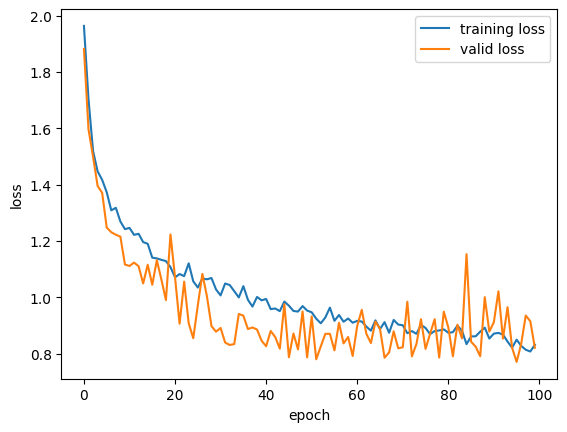

8/8 [==============================] - 0s 6ms/step - loss: 0.7480 - accuracy: 0.7440
test loss: 0.748
test accuracy: 0.744


In [ ]:
# 繪製learning curve
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# 重新載入最佳模型
best_model = tf.keras.models.load_model("model_improve.keras")

# 在測試集上評估最佳模型
test_loss, test_accuracy = best_model.evaluate(test_dataset)
print("test loss:", round(test_loss,4))
print("test accuracy:", round(test_accuracy,4))

> Ans: 從(d)觀察到的learning curve確實存在overfitting，同時也反映在測試集上test loss: 0.9662; test accuracy: 0.712，經過augmentation layer進行改進後，從learning curve可以看到，雖然loss還是偏高，但train與valid皆有下降，且test loss: 0.748; test accuracy: 0.744，也比(d)的結果更好一些

#### (f) Use `cleanlab` to find the possible label issue in the validation set using the mode you build in (b). You can follow the below procedure: (10%)

1. Wrap the model with `scikeras` or `sktorch`. Set the optimizer, epochs and batch size to `Adam`, `30` and `32`, respectively.
2. Extract the image data and labels from the validation set into `X` and `y` `NumPy` arrays.
3. Get the out-of-sample prediction probabilities using 
```python
pred_probs = cross_val_predict(
    clf,
    X,
    y,
    cv=3,
    method="predict_proba",
)
```
4. Find the top 9 possible label issues using `find_label_issues()` and plot them using `plot_examples()` provided below.

Comment on your results.

Hint: You can also inspect the `class_dict.json` file to see the corresponding class for each label.

In [ ]:
def plot_examples(id_iter, nrows=1, ncols=1):
    for count, id in enumerate(id_iter):
        plt.subplot(nrows, ncols, count + 1)
        plt.imshow(X[id].reshape(64, 64, 3).astype("uint8"))
        plt.title(f"id: {id} \n label: {labels[id]}")
        plt.axis("off")

    plt.tight_layout(h_pad=2.0)

In [ ]:
# coding your answer here.
import numpy as np
import cleanlab
from sklearn.model_selection import cross_val_predict
from scikeras.wrappers import KerasClassifier
from cleanlab.filter import find_label_issues
from cleanlab.classification import CleanLearning
#包裝model
clf = KerasClassifier(
    model=model,
    epochs=30,
    fit__batch_size=32
)

validation_images = []
validation_labels = []

for images, labels in validation_dataset:
    # 將圖片和labels存到對應的list
    validation_images.extend(images.numpy())
    validation_labels.extend(labels.numpy())

# 將list轉換成np.array
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)
X=validation_images
y=validation_labels

#獲取out-of sample預測機率
pred_probs = cross_val_predict(
 clf,
 X,
 y,
 cv=3,
 method="predict_proba",
)
#將labels資訊改成1D array
validation_labels_1d = np.argmax(validation_labels, axis=1)

# Using cleanlab to find possible label issues
ranked_label_issues = find_label_issues(
    validation_labels_1d,
    pred_probs,
    return_indices_ranked_by="self_confidence",
)

print(f"Cleanlab found {len(ranked_label_issues)} label issues.")
print(f"Top 9 most likely label errors: \n {ranked_label_issues[:9]}")

Epoch 1/30
6/6 [==============================] - 2s 7ms/step - loss: 3.5528 - accuracy: 0.5843
Epoch 2/30
6/6 [==============================] - 0s 7ms/step - loss: 1.9269 - accuracy: 0.6386
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 1.0626 - accuracy: 0.6928
Epoch 4/30
6/6 [==============================] - 0s 7ms/step - loss: 0.6533 - accuracy: 0.7831
Epoch 5/30
6/6 [==============================] - 0s 7ms/step - loss: 0.5756 - accuracy: 0.8313
Epoch 6/30
6/6 [==============================] - 0s 7ms/step - loss: 0.2531 - accuracy: 0.9036
Epoch 7/30
6/6 [==============================] - 0s 7ms/step - loss: 0.1706 - accuracy: 0.9458
Epoch 8/30
6/6 [==============================] - 0s 7ms/step - loss: 0.0988 - accuracy: 0.9759
Epoch 9/30
6/6 [==============================] - 0s 6ms/step - loss: 0.0695 - accuracy: 0.9819
Epoch 10/30
6/6 [==============================] - 0s 7ms/step - loss: 0.0778 - accuracy: 0.9819
Epoch 11/30
6/6 [======================

Epoch 1/30
6/6 [==============================] - 2s 7ms/step - loss: 3.7346 - accuracy: 0.5689
Epoch 2/30
6/6 [==============================] - 0s 7ms/step - loss: 2.1879 - accuracy: 0.6347
Epoch 3/30
6/6 [==============================] - 0s 7ms/step - loss: 1.2901 - accuracy: 0.6766
Epoch 4/30
6/6 [==============================] - 0s 7ms/step - loss: 0.7184 - accuracy: 0.7784
Epoch 5/30
6/6 [==============================] - 0s 7ms/step - loss: 0.5460 - accuracy: 0.8323
Epoch 6/30
6/6 [==============================] - 0s 7ms/step - loss: 0.3473 - accuracy: 0.8802
Epoch 7/30
6/6 [==============================] - 0s 7ms/step - loss: 0.2092 - accuracy: 0.9461
Epoch 8/30
6/6 [==============================] - 0s 6ms/step - loss: 0.1290 - accuracy: 0.9760
Epoch 9/30
6/6 [==============================] - 0s 6ms/step - loss: 0.0928 - accuracy: 0.9940
Epoch 10/30
6/6 [==============================] - 0s 7ms/step - loss: 0.0667 - accuracy: 0.9940
Epoch 11/30
6/6 [======================

Epoch 1/30
6/6 [==============================] - 2s 12ms/step - loss: 3.0142 - accuracy: 0.6108
Epoch 2/30
6/6 [==============================] - 0s 8ms/step - loss: 1.9035 - accuracy: 0.6826
Epoch 3/30
6/6 [==============================] - 0s 7ms/step - loss: 0.8431 - accuracy: 0.7545
Epoch 4/30
6/6 [==============================] - 0s 7ms/step - loss: 0.6387 - accuracy: 0.8263
Epoch 5/30
6/6 [==============================] - 0s 7ms/step - loss: 0.3301 - accuracy: 0.8862
Epoch 6/30
6/6 [==============================] - 0s 7ms/step - loss: 0.2540 - accuracy: 0.9042
Epoch 7/30
6/6 [==============================] - 0s 8ms/step - loss: 0.1915 - accuracy: 0.9281
Epoch 8/30
6/6 [==============================] - 0s 7ms/step - loss: 0.1451 - accuracy: 0.9461
Epoch 9/30
6/6 [==============================] - 0s 9ms/step - loss: 0.0795 - accuracy: 0.9760
Epoch 10/30
6/6 [==============================] - 0s 8ms/step - loss: 0.0532 - accuracy: 0.9820
Epoch 11/30
6/6 [=====================

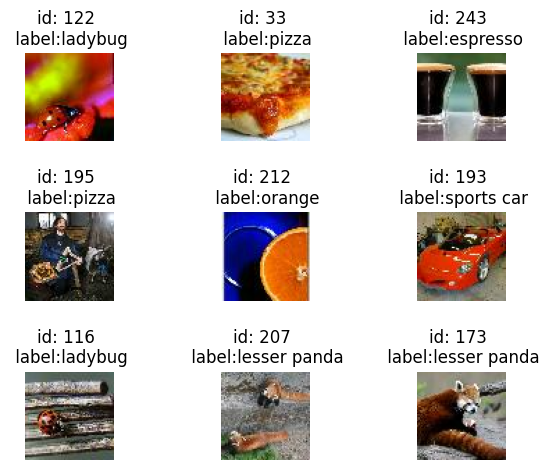

In [ ]:
def plot_examples(id_iter, nrows=1, ncols=1):
    for count, id in enumerate(id_iter):
        plt.subplot(nrows, ncols, count + 1)
        plt.imshow(X[id].reshape(64, 64, 3).astype("uint8"))
        one_hot_form=y[id]#取得對應標籤的one hot形式
        class_index=np.argmax(one_hot_form)
        class_serial_num=class_names[class_index]#找到對應資料夾名稱
        title_name=labels_info[class_serial_num]['class']#找到資料夾名稱對應的類別
        #因為同個類別下有很多種名稱，圖中顯示第一種說法
        title_name = title_name.split(',')
        title_name = title_name[0]
        plt.title(f"id: {id} \n label:"+title_name)
        plt.axis("off")

    plt.tight_layout(h_pad=2.0)
# Plot the top 9 possible label issues
plot_examples(ranked_label_issues[(range(9))], nrows=3, ncols=3)

> Ans: 以(b)的CNN架構建立模型，Cleanlab found 96 label issues, Top 9 most likely label errors:  [122  33 243 195 212 193 116 207 173]，圖中title的label只顯示了該類別的其中一種說法而已